# Projet 4 - Segmentez des clients d'un site e-commerce

## Analyse exploratoire et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.

### Table des matières
1. [Importation et préparation des données](#1-importation-et-préparation-des-données)
2. [Analyse des données manquantes](#2-analyse-des-données-manquantes)
3. [Analyse des variables numériques](#3-analyse-des-variables-numériques)
4. [Analyse des variables catégorielles](#4-analyse-des-variables-catégorielles)
5. [Analyse des corrélations](#5-analyse-des-corrélations)
6. [Conclusion et prochaines étapes](#6-conclusion-et-prochaines-étapes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

# Pour une meilleure lisibilité des graphiques
plt.style.use('ggplot')  # Utilisation d'un style valide de matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

# Configuration de seaborn pour une meilleure esthétique
sns.set_theme(style="whitegrid")

## 1. Importation et préparation des données

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/customer_segments3_202409201627.csv')
print(f"Le jeu initial de données contient {df.shape[0]} observations réparties en {df.shape[1]} colonnes/variables.")
df.info()

Le jeu initial de données contient 97078 observations réparties en 13 colonnes/variables.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97078 entries, 0 to 97077
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         97078 non-null  object 
 1   total_orders               97078 non-null  int64  
 2   avg_delivery_time_days     94892 non-null  float64
 3   last_order_date            97078 non-null  object 
 4   days_since_last_order      97078 non-null  float64
 5   total_spent                97078 non-null  float64
 6   avg_review_score           96353 non-null  float64
 7   avg_delivery_delay_days    97078 non-null  float64
 8   max_delivery_delay_days    97078 non-null  float64
 9   last_order_status          97078 non-null  object 
 10  has_comment                97078 non-null  int64  
 11  last_payment_type          97077 non-null  object 
 12  last_payment

In [3]:
import numpy as np
import pandas as pd

# Supposons que 'df' soit votre DataFrame initial contenant :
# - 'total_orders' : le nombre total de commandes pour chaque client
# - 'total_spent' : le montant total dépensé par chaque client
# - 'days_since_last_order' : le nombre de jours écoulés depuis la dernière commande

# 1. Calcul du ratio de dépense moyenne par commande
df['avg_spent_per_order'] = df['total_spent'] / df['total_orders']

# 2. Calcul de l'intervalle moyen entre commandes (en jours)
# Pour les clients ayant plus d'une commande, on estime l'intervalle moyen en divisant
# le nombre de jours depuis la dernière commande par (total_orders - 1).
# Pour les clients avec une seule commande, on ne peut pas calculer cet intervalle,
# on le remplace alors par le nombre de jours depuis la dernière commande (ou une autre valeur par défaut).
df['avg_days_between_orders'] = df.apply(
    lambda row: row['days_since_last_order'] / (row['total_orders'] - 1) if row['total_orders'] > 1 else np.nan,
    axis=1
)
df['avg_days_between_orders'].fillna(df['days_since_last_order'], inplace=True)

# 3. Calcul d'un score de fidélité combiné
# Ici, le score est défini comme le ratio entre la dépense moyenne par commande et l'intervalle moyen entre commandes.
# Un score plus élevé indique un client dépensant beaucoup par commande et passant peu de temps entre ses commandes.
# On ajoute 1 à l'intervalle pour éviter toute division par zéro.
df['loyalty_score'] = df['avg_spent_per_order'] / (df['avg_days_between_orders'] + 1)

# Affichage des nouvelles variables pour vérification
print(df[['total_orders', 'total_spent', 'days_since_last_order',
          'avg_spent_per_order', 'avg_days_between_orders', 'loyalty_score']].head())


   total_orders  total_spent  days_since_last_order  avg_spent_per_order  \
0             1       141.90             160.315174               141.90   
1             1        27.19             163.304757                27.19   
2             1        86.22             585.892535                86.22   
3             1        43.62             369.917095                43.62   
4             1       196.89             336.947639               196.89   

   avg_days_between_orders  loyalty_score  
0               160.315174       0.879644  
1               163.304757       0.165485  
2               585.892535       0.146909  
3               369.917095       0.117600  
4               336.947639       0.582605  


## 2. Analyse des données manquantes

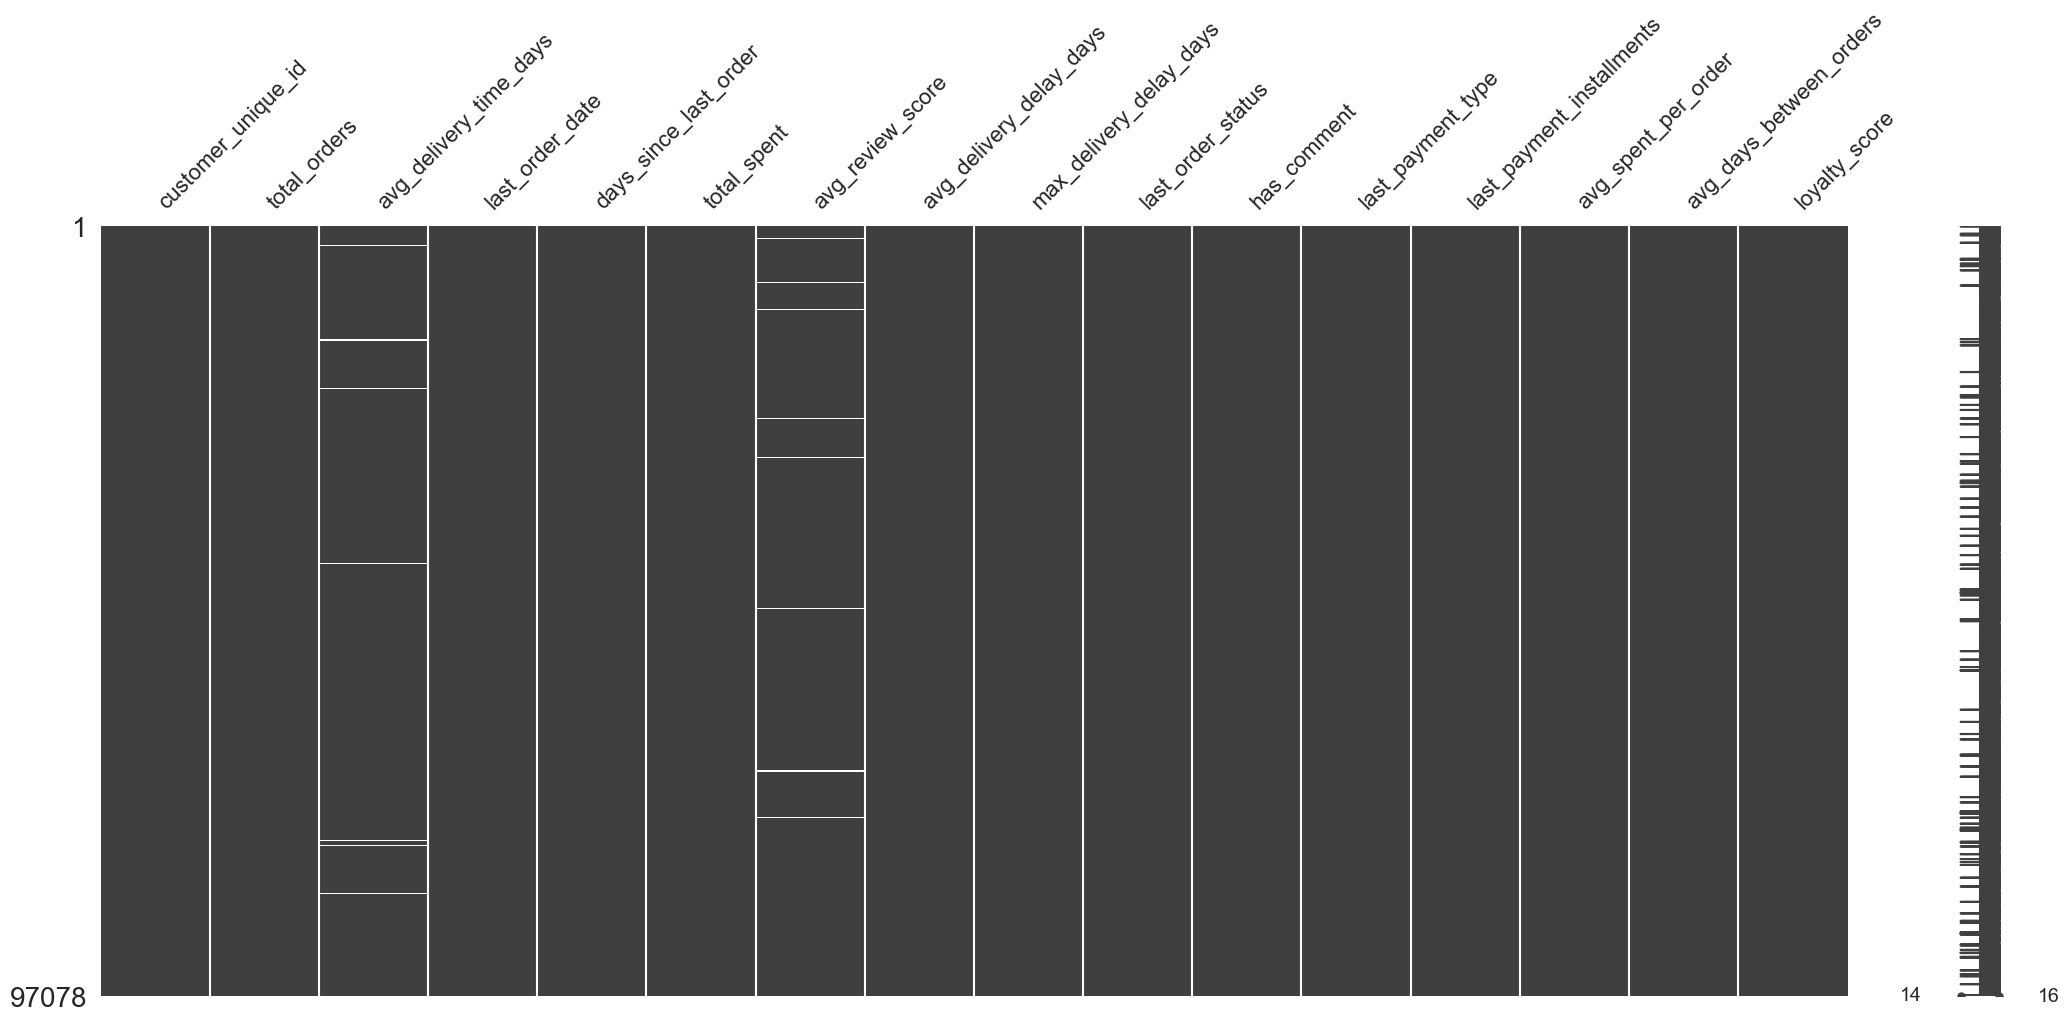

In [4]:
DataAnalysis.show_columns_population(df, 'matrix')

In [5]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,last_order_date,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,last_order_status,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score
35688,5dbbda7fd2a3d5d3e748cdca489b68dd,1,7.315741,2018-08-02 14:37:51,76.161424,45.21,5.0,0.0,0.0,delivered,0,credit_card,1.0,45.21,76.161424,0.585915
12666,213fc0fc021c524857acbd7611c8b24c,1,3.270081,2018-01-13 16:34:22,277.080509,42.68,5.0,0.0,0.0,delivered,0,credit_card,2.0,42.68,277.080509,0.153481
92848,f4b66443571595d4b3f236d0952d95c6,1,11.266817,2018-04-01 17:28:15,199.043090,140.63,5.0,0.0,0.0,delivered,0,credit_card,8.0,140.63,199.043090,0.702999
59180,9bde95ea1c0fc21776b2fe114807c556,1,10.784132,2017-11-11 18:05:34,340.017176,46.00,5.0,0.0,0.0,delivered,0,credit_card,4.0,46.00,340.017176,0.134891
66563,af32f3c7d7fd3f19c601601a36e0ee7e,1,8.306516,2018-06-05 11:57:19,134.272905,274.71,2.0,0.0,0.0,delivered,1,credit_card,3.0,274.71,134.272905,2.030784
93652,f6ce4ae4c54b4de1104b25c40fa483be,1,NaN,2017-02-15 23:00:16,608.812523,179.92,2.0,0.0,0.0,processing,1,credit_card,1.0,179.92,608.812523,0.295041
65942,ada67b3ed949902cbd2d3598115d7cb9,1,7.242419,2017-09-25 13:40:42,387.201111,57.91,5.0,0.0,0.0,delivered,0,credit_card,5.0,57.91,387.201111,0.149175
71430,bc25ba883947edc26a551f5546913c90,1,7.100428,2017-08-09 15:57:46,434.105926,106.72,5.0,0.0,0.0,delivered,0,credit_card,4.0,106.72,434.105926,0.245274
30994,518de4c3f1112cc288a2e59d9c7ea234,1,NaN,2017-05-05 15:52:18,530.109722,76.05,1.0,0.0,0.0,invoiced,1,credit_card,6.0,76.05,530.109722,0.143191
85767,e1e5d24d0c01782ede8c4fb9adf43e6f,1,9.437257,2018-04-23 13:49:33,177.194965,210.93,5.0,0.0,0.0,delivered,0,credit_card,5.0,210.93,177.194965,1.183703


In [6]:
# On supprime la colonne "last_order_date" car elle ne nous sera pas utile, nous avons déjà la colonne "days_since_last_order"
df = df.drop(columns=['last_order_date'])

# On supprime les observations avec des valeurs manquantes
df = df.dropna()
print(f"Après suppression des valeurs manquantes, nous avons {df.shape[0]} observations utilisables.")

Après suppression des valeurs manquantes, nous avons 94269 observations utilisables.


## 3. Analyse des variables numériques

In [7]:
# Sélection des colonnes numériques
numeric_columns = df.select_dtypes(include=['number']).columns
print("Colonnes numériques :")
print(numeric_columns)

# Statistiques descriptives
df[numeric_columns].describe()

Colonnes numériques :
Index(['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score', 'avg_delivery_delay_days',
       'max_delivery_delay_days', 'has_comment', 'last_payment_installments',
       'avg_spent_per_order', 'avg_days_between_orders', 'loyalty_score'],
      dtype='object')


,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.757350,0.765609,0.408119,2.928248,160.255285,287.611113,0.808078
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.673798,4.695404,0.491488,2.708299,218.177023,152.806415,1.477122
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,0.000000,9.590000,5.796935,0.023585
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,0.000000,1.000000,62.170000,163.354329,0.214689
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,0.000000,2.000000,105.560000,268.339549,0.422863
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,0.000000,1.000000,4.000000,176.870000,397.123634,0.859718
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,188.975081,1.000000,24.000000,13664.080000,744.364907,76.454415


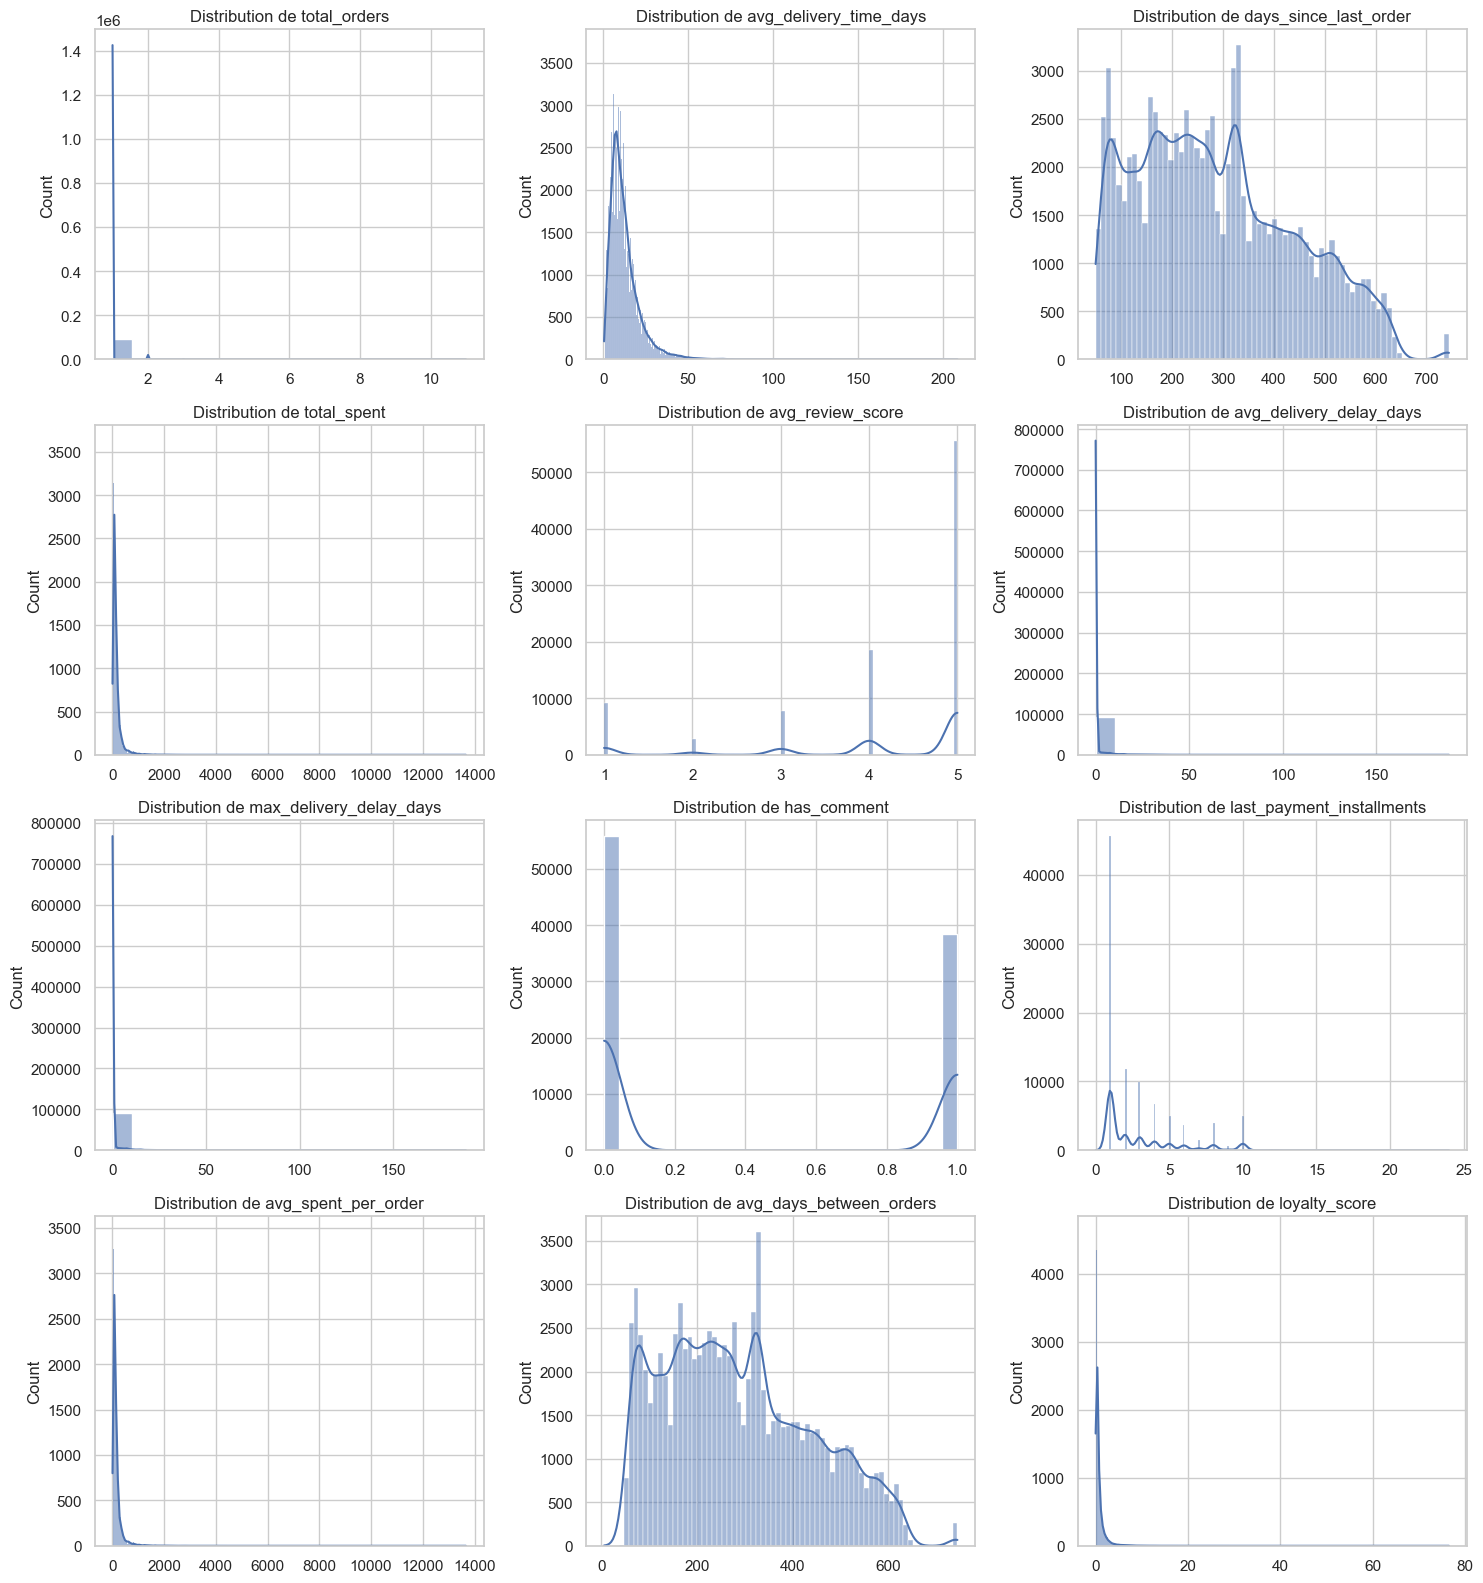

In [8]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre total de graphiques à tracer
num_plots = len(numeric_columns)
# Définir le nombre de colonnes souhaité, par exemple 3
num_cols = 3
# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()  # Mettre tous les axes dans un tableau 1D

for idx, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel('')

# Supprimer les axes inutilisés
for ax in axes[num_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [9]:
def remove_outliers(df, column):
	# Calcul des quartiles et de l'IQR
	Q1 = df[column].quantile(0.25)
	Q3 = df[column].quantile(0.75)
	IQR = Q3 - Q1

	# Définition des bornes
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	
	# Filtrer le DataFrame
	initial_count = len(df)
	filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
	removed_count = initial_count - len(filtered_df)
	
	# Affichage des informations
	print(f"Colonne '{column}' : {removed_count} outliers supprimés.")
	print(f"Nouvelles limites : lower_bound = {lower_bound:.2f}, upper_bound = {upper_bound:.2f}")
	
	return filtered_df

In [10]:
df = remove_outliers(df, 'avg_delivery_time_days')
df = remove_outliers(df, 'days_since_last_order')
df = remove_outliers(df, 'total_spent')
df = remove_outliers(df, 'avg_delivery_delay_days')
df = remove_outliers(df, 'max_delivery_delay_days')
df = remove_outliers(df, 'last_payment_installments')

Colonne 'avg_delivery_time_days' : 4779 outliers supprimés.
Nouvelles limites : lower_bound = -6.59, upper_bound = 29.03
Colonne 'days_since_last_order' : 0 outliers supprimés.
Nouvelles limites : lower_bound = -197.24, upper_bound = 758.20
Colonne 'total_spent' : 7061 outliers supprimés.
Nouvelles limites : lower_bound = -111.36, upper_bound = 350.74
Colonne 'avg_delivery_delay_days' : 3532 outliers supprimés.
Nouvelles limites : lower_bound = 0.00, upper_bound = 0.00
Colonne 'max_delivery_delay_days' : 0 outliers supprimés.
Nouvelles limites : lower_bound = 0.00, upper_bound = 0.00
Colonne 'last_payment_installments' : 3581 outliers supprimés.
Nouvelles limites : lower_bound = -3.50, upper_bound = 8.50


# Analyse de la colonne 'total_orders'

In [11]:
# Trouver les valeurs différentes et le count pour chacun d'elle pour cette colonne
df['total_orders'].value_counts()

total_orders
1    74437
2      837
3       39
4        2
6        1
Name: count, dtype: int64

Nous constatons que la plupart des clients ont fait une seule commande. Nous allons donc classer les clients en deux buckets : 
- ceux qui ont fait une seule commande
- ceux qui ont fait plus d'une commande

In [12]:
# Créer une colonne "only_one_order" qui sera à 1 si le client n'a passé qu'une seule commande, 0 sinon
df['more_than_one_order'] = df['total_orders'].apply(lambda x: 0 if x == 1 else 1)

# On peut alors drop la colonne "total_orders"
df = df.drop(columns=['total_orders'])

# Enlever 'total_order' de numeric_columns
numeric_columns = numeric_columns.drop('total_orders')
# Ajouter 'only_one_order' à numeric_columns
numeric_columns = numeric_columns.insert(0, 'more_than_one_order')

# Analyse de la colonne 'avg_delivery_time_days'

On constate sur le graphique de répartition de cette colonne que la courbe est bien lisse pour les valeurs inférieures à 70 jours. Nous allons donc éliminer les valeurs supérieures à 70 jours qui sont des outliers.

In [13]:
# Enlever les lignes avec des valeurs supérieures à 70 pour la colonne 'avg_delivery_time_days'
# df = df[df['avg_delivery_time_days'] <= 70]

# Analyse de la colonne 'days_since_last_order'

On constate sur le graphique de répartition de cette colonne que la courbe est bien lisse pour les valeurs inférieures à 650 jours. Nous allons donc éliminer les valeurs supérieures à 650 jours qui sont des outliers.

In [14]:
# Enlever les lignes avec des valeurs supérieures à 70 pour la colonne 'days_since_last_order'
# df = df[df['days_since_last_order'] <= 650]

# Analyse de la colonne 'total_spent'

On constate sur le graphique de répartition de cette colonne que la courbe est bien lisse pour les valeurs inférieures à 1000. Nous allons donc éliminer les valeurs supérieures à 1000 qui sont des outliers.

In [15]:
# Enlever les lignes avec des valeurs supérieures à 1000 pour la colonne 'total_spent'
# df = df[df['total_spent'] <= 1000]

# Voyons si nos graphes sont plus précis et exploitable maintenant que les outliers ont été enlevés

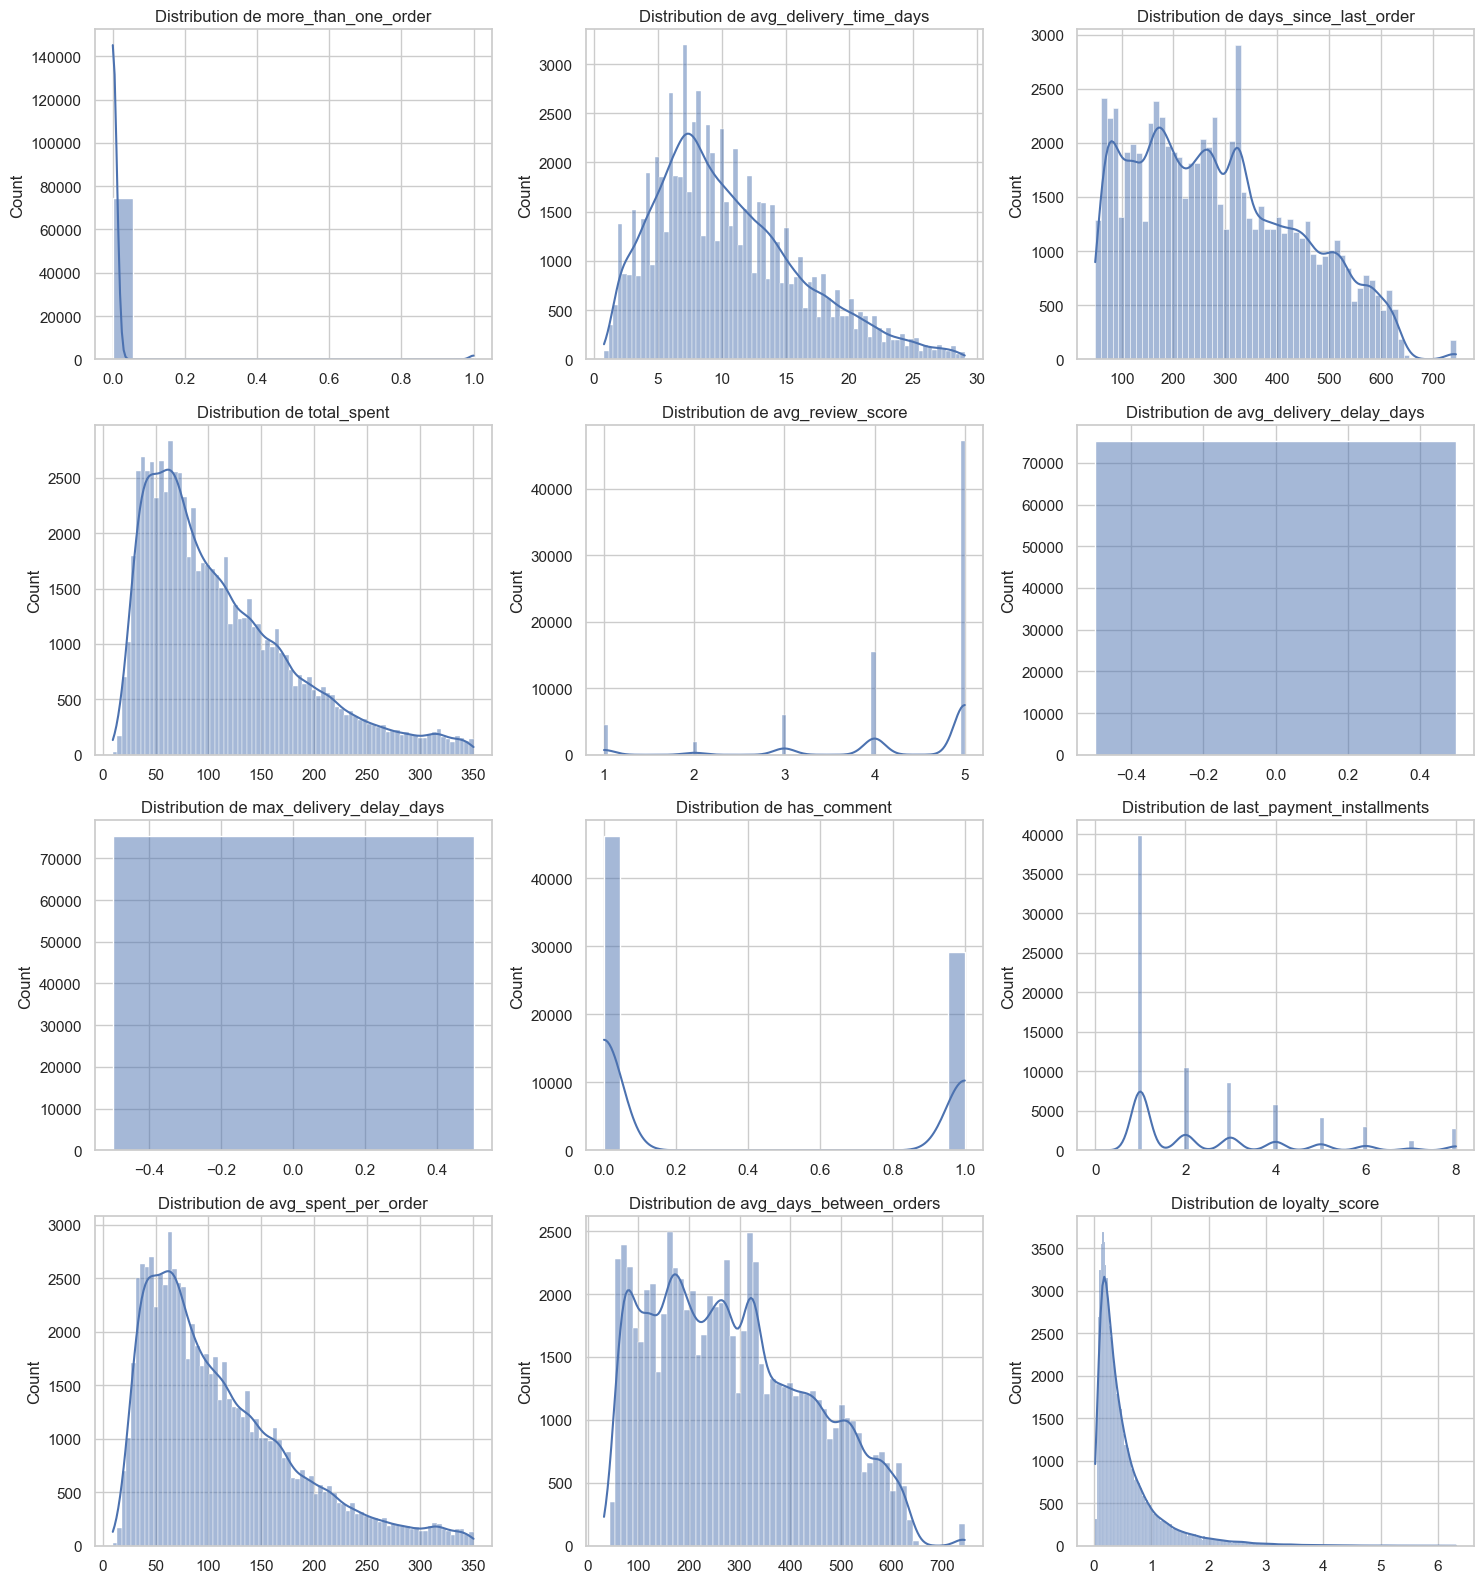

In [17]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre total de graphiques à tracer
num_plots = len(numeric_columns)
# Définir le nombre de colonnes souhaité, par exemple 3
num_cols = 3
# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()  # Mettre tous les axes dans un tableau 1D

for idx, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel('')

# Supprimer les axes inutilisés
for ax in axes[num_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [18]:
# show number of lines remaining after removing outliers
print(f"Après suppression des outliers, nous avons {df.shape[0]} observations utilisables.")

Après suppression des outliers, nous avons 75316 observations utilisables.


In [19]:
df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,last_order_status,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,more_than_one_order
2442,067843a903239951b74d81abf2c9bf37,18.389595,474.370637,216.07,3.0,0.0,0.0,delivered,0,boleto,1.0,216.07,474.370637,0.454530,0
51978,8904db4793f88ea3508c678371f2dc70,12.987257,581.080718,29.84,5.0,0.0,0.0,delivered,1,boleto,1.0,29.84,581.080718,0.051264,0
45711,786165c8823a3fd635edab35df391d27,15.098970,245.246713,43.59,5.0,0.0,0.0,delivered,1,debit_card,1.0,43.59,245.246713,0.177018,0
85092,e0114238af7a9aac7fcea56cf2e43cb9,22.379931,213.228854,39.50,5.0,0.0,0.0,delivered,0,credit_card,1.0,39.50,213.228854,0.184382,0
5509,0e892e090fb1f8f86c2dd08805c32467,9.723021,260.845266,286.59,5.0,0.0,0.0,delivered,0,boleto,1.0,286.59,260.845266,1.094501,0
80455,d3b2cbe73e25237ccde99c53c4d6750a,11.298947,383.347569,147.34,5.0,0.0,0.0,delivered,0,boleto,1.0,147.34,383.347569,0.383351,0
78382,ce8cc53968c25838eafe119cc6fcf511,4.806412,386.894850,335.47,4.0,0.0,0.0,delivered,1,credit_card,5.0,335.47,386.894850,0.864848,0
47716,7d8192d44dfce7e31e4d9888a523cf9e,13.293877,91.303264,129.77,5.0,0.0,0.0,delivered,0,credit_card,5.0,129.77,91.303264,1.405909,0
56188,9447779f266e544c854444992a43f576,16.639468,94.916354,94.04,5.0,0.0,0.0,delivered,1,credit_card,4.0,94.04,94.916354,0.980438,0
29841,4e835811a556582a8850b17260c0ba66,5.255810,126.205984,159.84,5.0,0.0,0.0,delivered,0,credit_card,3.0,159.84,126.205984,1.256545,0


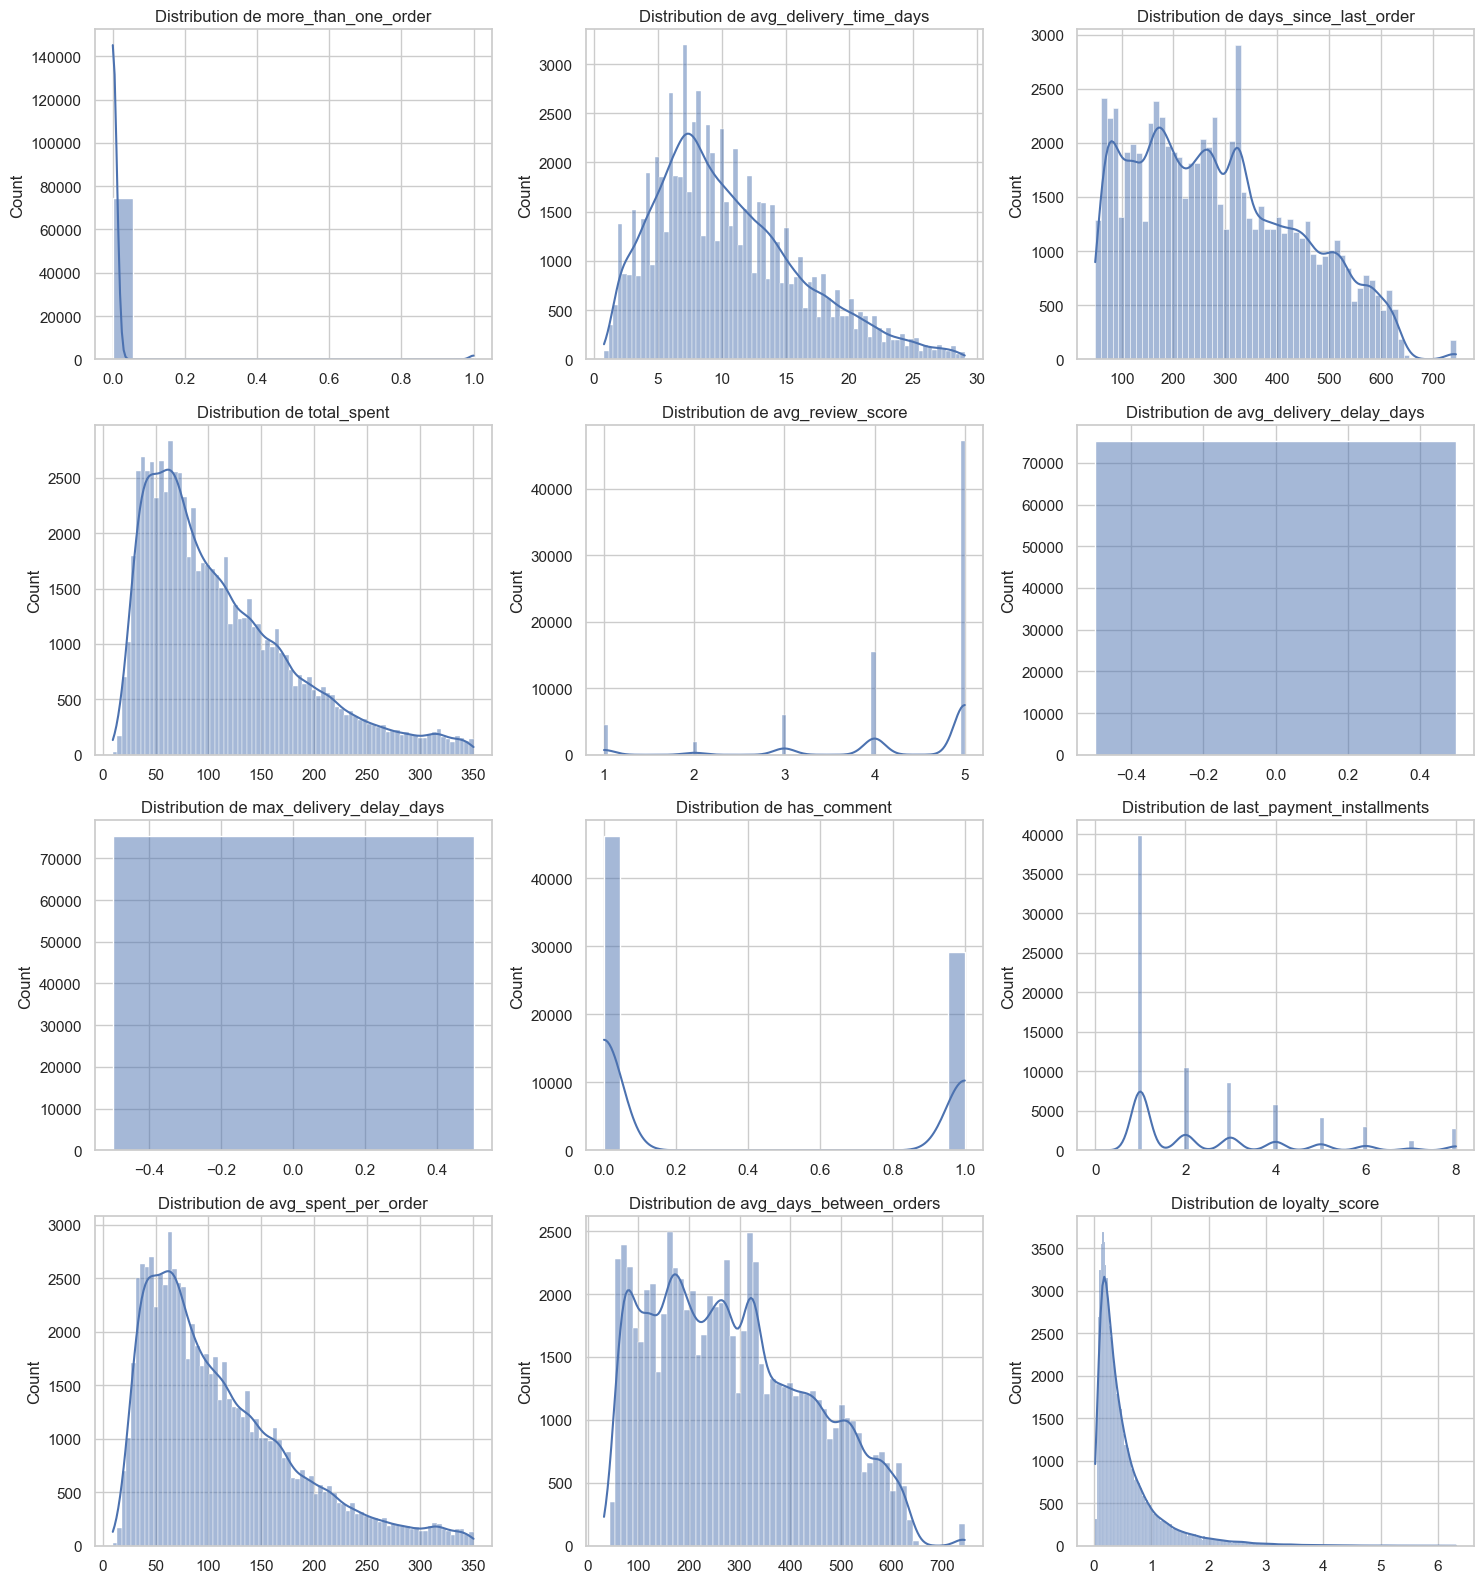

In [21]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre total de graphiques à tracer
num_plots = len(numeric_columns)
# Définir le nombre de colonnes souhaité, par exemple 3
num_cols = 3
# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()  # Mettre tous les axes dans un tableau 1D

for idx, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel('')

# Supprimer les axes inutilisés
for ax in axes[num_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [22]:
# Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent des valeurs identiques. Nous le vérifions, et si c'est le cas, supprimons une des colonnes.
print("Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent-elles les mêmes valeurs ?")
sameValues = (df['max_delivery_delay_days'] == df['avg_delivery_delay_days']).all()

# quelles sont les valeurs différentes entre les deux colonnes ?
if not sameValues:
    print("Les colonnes max_delivery_delay_days et avg_delivery_delay_days ne contiennent pas les mêmes valeurs.")
    print("Valeurs différentes entre les deux colonnes :")
    print(df.loc[df['max_delivery_delay_days'] != df['avg_delivery_delay_days'], ['max_delivery_delay_days', 'avg_delivery_delay_days']])

# Suppression de la colonne avg_delivery_delay_days
if sameValues:
    print("Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent les mêmes valeurs. Nous allons supprimer la colonne avg_delivery delay_days.")
    df = df.drop(columns=['avg_delivery_delay_days'])
    numeric_columns = numeric_columns.drop('avg_delivery_delay_days')

Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent-elles les mêmes valeurs ?
Les colonnes max_delivery_delay_days et avg_delivery_delay_days contiennent les mêmes valeurs. Nous allons supprimer la colonne avg_delivery delay_days.


In [ ]:
# Il n'y a que 188 cas où la valeur est différente. Nous supprimons la colonne avg_delivery_delay_days.
# df = df.drop(columns=['avg_delivery_delay_days'])

# on enlève avg_delivery_delay_days de numeric_columns

### Analyse des outliers

Nous pouvons observer que certaines variables comme 'total_orders', 'total_spent', et 'max_delivery_delay_days' présentent des valeurs extrêmes. Ces outliers peuvent être légitimes dans le contexte d'un site e-commerce (par exemple, des clients très fidèles ou des commandes très importantes), mais il faudra les prendre en compte lors de la modélisation.

## 4. Analyse des variables catégorielles

In [23]:
# Sélection des colonnes catégorielles
categorical_columns = df.select_dtypes(exclude=['number']).columns
print("Colonnes catégorielles :")
print(categorical_columns)

# Affichage des valeurs uniques pour chaque variable catégorielle
for col in categorical_columns:
    # Seulement si ce n'est pas customer_unique_id
    if col == 'customer_unique_id':
        continue
    print(f"\nValeurs uniques dans {col}:")
    print(df[col].value_counts())

Colonnes catégorielles :
Index(['customer_unique_id', 'last_order_status', 'last_payment_type'], dtype='object')

Valeurs uniques dans last_order_status:
last_order_status
delivered    75313
canceled         3
Name: count, dtype: int64

Valeurs uniques dans last_payment_type:
last_payment_type
credit_card    57144
boleto         15621
voucher         1286
debit_card      1265
Name: count, dtype: int64


In [24]:
# La colonne "last_order_status" ne contient qu'une seule valeur à l'exception de 6 individus, on la supprime
df = df.drop(columns=['last_order_status'])

In [25]:
# La colonne "last_payment_type" contient une majorité de "credit_card". Nous allons utiliser 2 valeurs pour cette colonne, credit_card et other
df['last_payment_type'] = df['last_payment_type'].apply(lambda x: 'credit_card' if x == 'credit_card' else 'other')

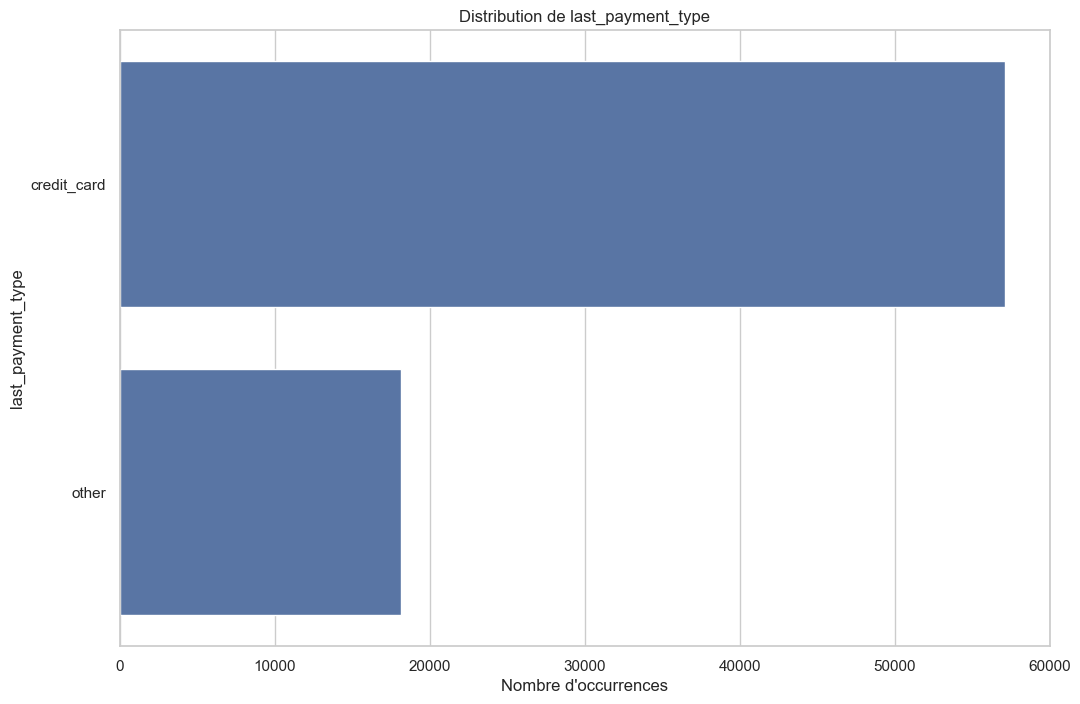

In [26]:
# Colonnes catégorielles sans customer_unique_id
categorical_columns = categorical_columns.drop(['customer_unique_id', 'last_order_status'])

# # Visualisation de la distribution de la variable catégorielle "last_payment_type"
sns.countplot(y=df['last_payment_type'])
plt.title('Distribution de last_payment_type')
plt.xlabel('Nombre d\'occurrences')
plt.show()


# fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 6*len(categorical_columns)))

# for idx, col in enumerate(categorical_columns):
#     sns.countplot(y=df[col], ax=axes[idx])
#     axes[idx].set_title(f'Distribution de {col}')
#     axes[idx].set_xlabel('Nombre d\'occurrences')

# plt.tight_layout()
# plt.show()

## 5. Analyse des corrélations

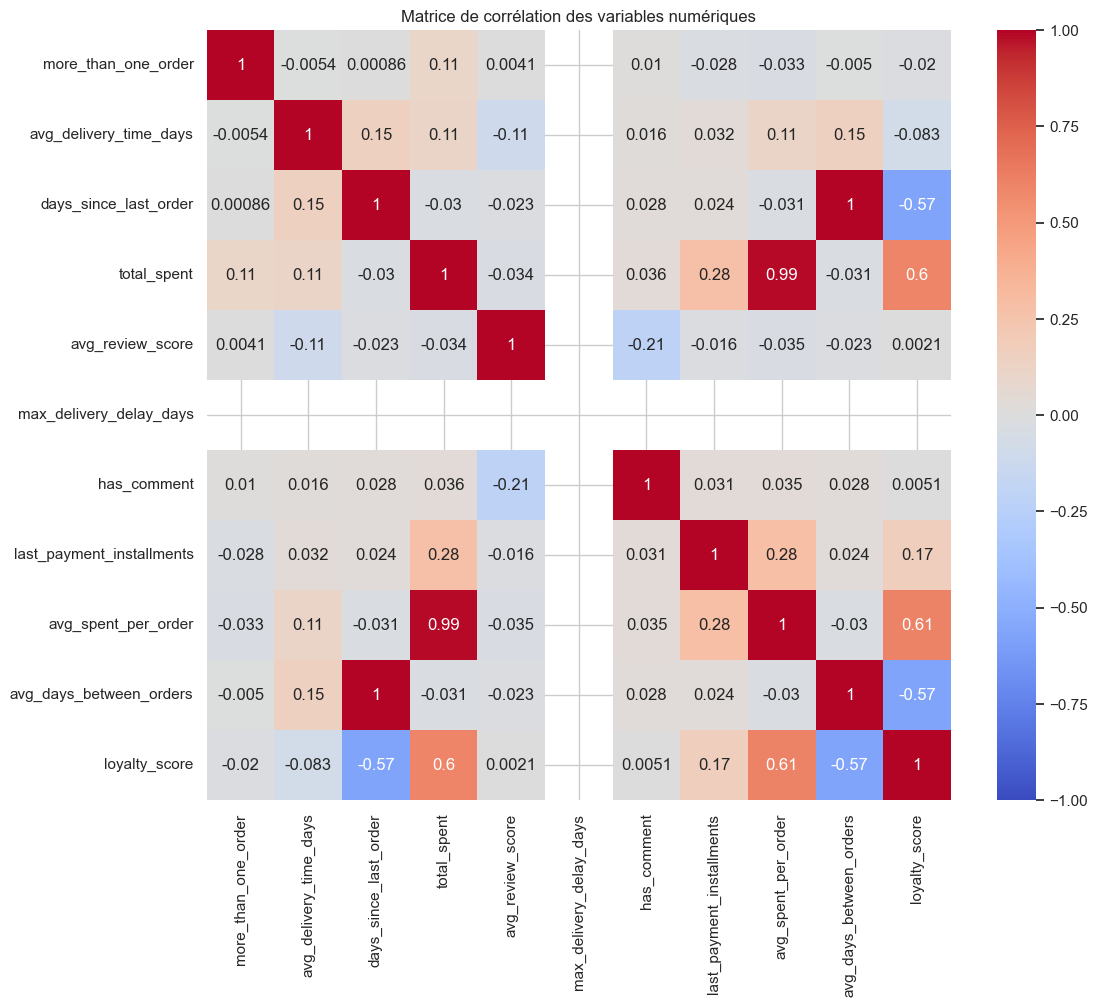

La matrice de corrélation a été sauvegardée dans 'data/correlation_matrix.csv'


In [27]:
# Calcul de la matrice de corrélation
correlation_matrix = df[numeric_columns].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

# Sauvegarde de la matrice de corrélation
correlation_matrix.to_csv('data/correlation_matrix.csv')
print("La matrice de corrélation a été sauvegardée dans 'data/correlation_matrix.csv'")

In [28]:
df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,more_than_one_order
26347,4562ff1863c6ec3729c71a3162ef69dc,10.390521,449.356597,178.89,5.0,0.0,1,credit_card,5.0,178.89,449.356597,0.397219,0
19364,32f69fc8a1a91eaa34422fffd0e12fd6,10.174132,253.362581,50.09,5.0,0.0,1,credit_card,4.0,50.09,253.362581,0.196924,0
91121,f0171b36faf1ce03f0cd9b9599af78bb,5.737419,291.841863,46.78,5.0,0.0,0,credit_card,2.0,46.78,291.841863,0.159745,0
44855,7610ca62a520495cdb21d6972f9eb3a2,9.956042,416.895139,41.81,5.0,0.0,0,other,1.0,41.81,416.895139,0.100049,0
52420,8a3cfe26ce6c10eb786ae3d9f1a86552,6.487106,491.360741,73.43,4.0,0.0,0,credit_card,7.0,73.43,491.360741,0.149139,0
79419,d120c049f659246d71b67c12170ec27b,7.955752,331.237245,77.89,5.0,0.0,0,credit_card,7.0,77.89,331.237245,0.234441,0
64931,aaf15d285622a5955ded9756e0cd33e6,9.776678,333.945324,38.10,5.0,0.0,0,credit_card,1.0,38.10,333.945324,0.113750,0
28509,4b271dbd4bfeefce07c67cfb51448390,17.200289,289.045266,35.40,4.0,0.0,0,credit_card,1.0,35.40,289.045266,0.122050,0
57783,984d917117d762201643440a2c2e001b,8.326933,455.401053,59.59,5.0,0.0,0,credit_card,5.0,59.59,455.401053,0.130565,0
61775,a2b3dadeee49f301f5307689f05d49c2,7.442535,58.355741,67.44,5.0,0.0,1,credit_card,5.0,67.44,58.355741,1.136200,0


### Analyse des corrélations

On peut observer quelques corrélations intéressantes :
1. Une forte corrélation positive entre 'total_orders' et 'total_spent', ce qui est logique.
2. Une corrélation modérée entre 'avg_delivery_time_days' et 'avg_delivery_delay_days', ce qui suggère que les retards de livraison contribuent significativement au temps de livraison total.
3. Une faible corrélation négative entre 'avg_review_score' et 'avg_delivery_delay_days', indiquant que les retards de livraison peuvent légèrement impacter la satisfaction client.

Ces corrélations seront importantes à considérer lors de la phase de modélisation pour éviter la multicolinéarité et pour choisir les variables les plus pertinentes pour la segmentation.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75316 entries, 0 to 97077
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         75316 non-null  object 
 1   avg_delivery_time_days     75316 non-null  float64
 2   days_since_last_order      75316 non-null  float64
 3   total_spent                75316 non-null  float64
 4   avg_review_score           75316 non-null  float64
 5   max_delivery_delay_days    75316 non-null  float64
 6   has_comment                75316 non-null  int64  
 7   last_payment_type          75316 non-null  object 
 8   last_payment_installments  75316 non-null  float64
 9   avg_spent_per_order        75316 non-null  float64
 10  avg_days_between_orders    75316 non-null  float64
 11  loyalty_score              75316 non-null  float64
 12  more_than_one_order        75316 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 8.

## 6. Conclusion et prochaines étapes

### Résumé de l'analyse exploratoire

1. Nous avons un jeu de données de 97078 clients avec 12 variables après nettoyage.
2. Les variables numériques présentent des distributions variées, certaines avec des outliers significatifs.
3. Les variables catégorielles sont principalement des identifiants uniques, à l'exception de 'customer_state' qui pourrait être utile pour la segmentation géographique.
4. Il existe des corrélations intéressantes entre certaines variables, notamment entre le nombre de commandes et le montant total dépensé.

### Prochaines étapes

1. Feature engineering : créer de nouvelles variables pertinentes, par exemple :
   - Ratio de dépense moyenne par commande
   - Fréquence d'achat (nombre de jours moyen entre les commandes)
   - Score de fidélité combinant plusieurs métriques
2. Normalisation des données : utiliser des techniques comme StandardScaler ou MinMaxScaler pour préparer les données à la modélisation.
3. Réduction de dimensionnalité : appliquer PCA ou t-SNE pour visualiser les données en 2D ou 3D et potentiellement réduire le nombre de variables.
4. Sélection de variables : choisir les variables les plus pertinentes pour la segmentation en évitant la multicolinéarité.
5. Modélisation : appliquer des algorithmes de clustering comme K-means, DBSCAN ou des méthodes hiérarchiques.
6. Évaluation et interprétation des clusters : analyser les caractéristiques de chaque segment de clients identifié.

Ces étapes nous permettront de créer une segmentation client efficace et exploitable pour le site e-commerce.

In [30]:
# Génération du fichier csv clean pour les modèles de machine learning
df.to_csv('data/clean.csv', index=False)
print("Le dataset nettoyé a été sauvegardé dans 'data/clean.csv'")

# Affichage d'un échantillon du dataset final
df.sample(10)

Le dataset nettoyé a été sauvegardé dans 'data/clean.csv'


,customer_unique_id,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,more_than_one_order
49624,82855248f0328943a0f172fe9748ad29,12.220880,437.197130,87.70,1.0,0.0,1,other,1.0,87.70,437.197130,0.200138,0
13885,247d272769453960c18cc56455fd0b62,13.346215,145.281412,93.81,3.0,0.0,1,credit_card,6.0,93.81,145.281412,0.641298,0
83646,dc41c213511c0ec2a73cb054afa83dc6,6.415394,329.285764,176.71,4.0,0.0,1,credit_card,2.0,176.71,329.285764,0.535022,0
39529,6802a5080e6f6ade0f077d30a4be19e6,17.459826,151.811377,193.37,5.0,0.0,0,credit_card,3.0,193.37,151.811377,1.265416,0
28424,4adb08de8932929dcf4fb86147020329,10.184606,80.053796,210.00,2.0,0.0,1,other,1.0,210.00,80.053796,2.590872,0
26332,455b49402053f170c64a3ae7fced73d4,2.973218,242.175498,50.73,4.0,0.0,1,credit_card,2.0,50.73,242.175498,0.208615,0
66602,af4a0bb895d2c8c821bd955648aca24e,16.103542,219.167118,235.70,5.0,0.0,0,other,1.0,235.70,219.167118,1.070550,0
24051,3f2fc946869677eba242bdea21fc4266,4.143669,121.999132,144.11,5.0,0.0,1,credit_card,3.0,144.11,121.999132,1.171634,0
35338,5ccfa4fba07870fd668345d60f1eae06,4.916238,177.817813,137.75,5.0,0.0,1,credit_card,3.0,137.75,177.817813,0.770337,0
84250,ddd57dba46e80a399319a60350ceb9f0,11.664236,600.134688,16.96,5.0,0.0,0,credit_card,1.0,16.96,600.134688,0.028213,0
